### This notebook can be used to create the JIRA user report based on months
### You need to download the report from JIRA
### Reference for downloading the report - https://community.atlassian.com/t5/Jira-Core-questions/How-to-generate-a-report-and-export-in-excel-sheet/qaq-p/276497
### Change the values as needed

In [1]:
import pandas as pd
from vincent.colors import brews

In [2]:
### Reading Jira report and converting to dataframe
### Also Adding a new column called Total_Tickets to get the sum of each users

In [3]:
df = pd.read_csv('./jira_updated.csv')
df['Total_Tickets'] = 1
df

,Issue Type,Issue key,Issue id,Parent id,Summary,Assignee,Reporter,Priority,Status,Resolution,Created,Updated,Due date,Total_Tickets
0,Task,DSOCS-652,78557,NaN,DSOCS: AWS Security Groups Review,subin.m,devsecops.jira_soccomply,Low,Closed,Done,24/Feb/20 1:05 PM,24/Feb/20 8:50 PM,NaN,1
1,Task,DSOCS-651,78556,NaN,DSOCS: AWS Elastic IP Review,subin.m,devsecops.jira_soccomply,Low,Closed,Done,24/Feb/20 1:05 PM,24/Feb/20 6:59 PM,NaN,1
2,Task,DSOCS-650,78555,NaN,DSOCS: Trusted Advisor Review,subin.m,devsecops.jira_soccomply,Low,Closed,Done,24/Feb/20 1:00 PM,24/Feb/20 7:36 PM,NaN,1
3,Task,DSOCS-648,78553,NaN,DSOCS: Review Alertlogic Config,subin.m,devsecops.jira_soccomply,Low,Closed,Done,24/Feb/20 1:00 PM,24/Feb/20 5:45 PM,NaN,1
4,Task,DSO-8958,78525,NaN,Setup databricks connect and databricks jupyte...,smaran.na,adarsh.namala,Low,Closed,Done,21/Feb/20 11:28 AM,21/Feb/20 11:32 AM,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Sub-task,DSO-8040,74362,74344.0,googleassistant-watch-aetnd-com,subin.m,harish.kumar,Low,Closed,Done,23/Oct/19 8:25 PM,03/Feb/20 9:16 PM,NaN,1
134,Sub-task,DSO-8034,74353,74344.0,npm-appsvcs-aetnd-com,subin.m,harish.kumar,Low,Closed,Done,23/Oct/19 8:23 PM,03/Feb/20 9:41 PM,NaN,1
135,Sub-task,DSO-8030,74348,74344.0,api-aenetworks-com,subin.m,harish.kumar,Low,Closed,Done,23/Oct/19 8:22 PM,10/Feb/20 6:05 PM,NaN,1
136,Task,DSO-6802,67380,NaN,Decommission push.devops.aetndigital.com,anudeep.gulla,smaran.na,Low,Closed,Done,13/Mar/19 3:56 PM,17/Feb/20 12:10 PM,NaN,1


In [4]:
### Dropping unwanted columns

In [5]:
df = df.drop(columns=['Issue id', 'Parent id', 'Issue Type', 'Priority', 'Resolution', 'Due date'])

In [6]:
### Adding local path of the final report

In [7]:
path = r"/Users/vkumar/Documents/jupyter-notebook/User_Feb_report.xlsx"
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

In [8]:
### Creating a new Dataframe called "df2" with only the user and total tickets

In [9]:
df_new = df[['Assignee', 'Total_Tickets']]
df2 = df_new.groupby('Assignee')['Total_Tickets'].sum().to_frame().reset_index().sort_values(by='Total_Tickets')
df2

,Assignee,Total_Tickets
1,harish.kumar,3
0,anudeep.gulla,6
5,vipin.kumar,8
3,smaran.na,9
2,kittu.sabu,48
4,subin.m,64


### Charts For Testing (Optional)

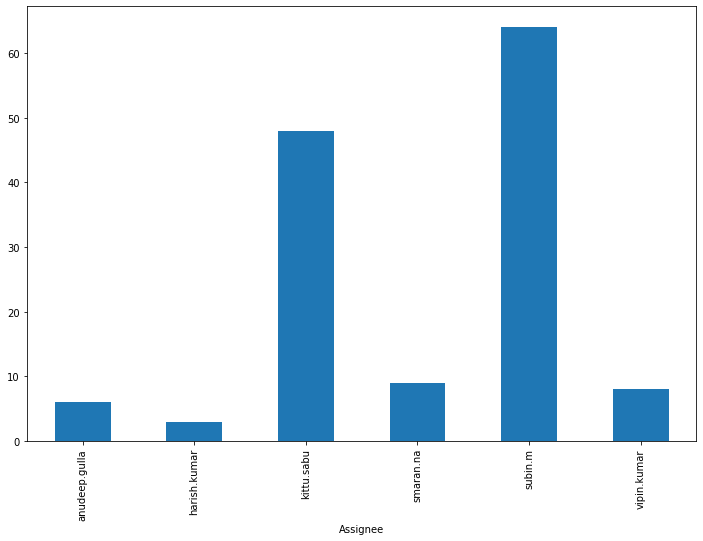

In [10]:
%matplotlib inline
df2.groupby(['Assignee'])['Total_Tickets'].sum().plot(
    kind='bar',
    figsize=(12,8)
)

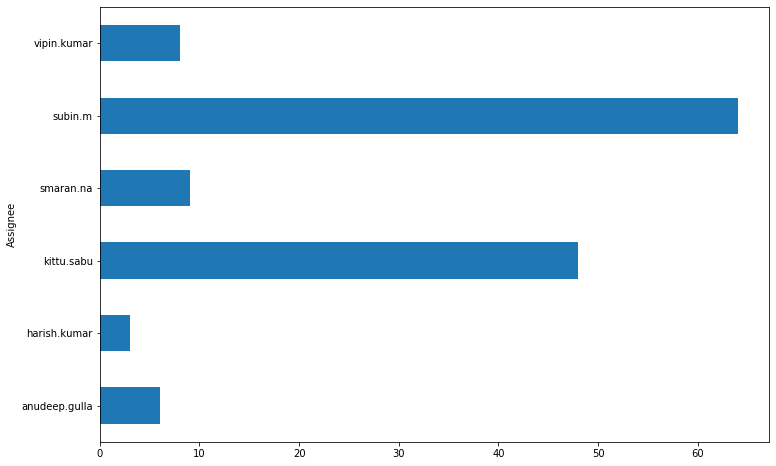

In [11]:
%matplotlib inline
df2.groupby(['Assignee'])['Total_Tickets'].sum().plot(
    kind='barh',
    figsize=(12,8)
)

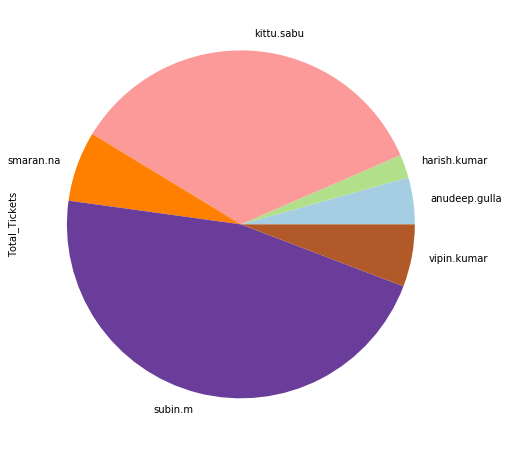

In [12]:
%matplotlib inline
chart = df2.groupby(['Assignee'])['Total_Tickets'].sum().plot(
    kind='pie',
    figsize=(12,8),
    colormap='Paired'
)

In [13]:
df = df.drop(columns=['Total_Tickets'])
df.sort_values(by=['Created'], inplace=True)
df['Created'] = pd.to_datetime(df['Created'])

In [14]:
gk = df.groupby('Assignee')
Vipin = gk.get_group('vipin.kumar')
Kittu = gk.get_group('kittu.sabu')
Anudeep = gk.get_group('anudeep.gulla')
Harish = gk.get_group('harish.kumar')
Subin = gk.get_group('subin.m')
Smaran = gk.get_group('smaran.na')
gk.get_group('vipin.kumar')

,Issue key,Summary,Assignee,Reporter,Status,Created,Updated
69,VIP-2972,Create CRON for iterable,vipin.kumar,Djamshed.Melikov,DONE,2020-02-04 22:00:00,21/Feb/20 9:08 PM
70,VIP-2971,Deactivate Naseer's account,vipin.kumar,Djamshed.Melikov,DONE,2020-02-04 21:35:00,05/Feb/20 12:49 PM
67,VIP-2975,Patch Update - extractor-vip-aetnd-com,vipin.kumar,Djamshed.Melikov,DONE,2020-02-05 14:29:00,05/Feb/20 10:20 PM
53,VIP-2978,Provide Developer access to Naheed,vipin.kumar,Djamshed.Melikov,DONE,2020-02-06 20:52:00,07/Feb/20 6:20 PM
50,VIP-2981,Patch Update - api-vip-aetndigital-com,vipin.kumar,vipin.kumar,DONE,2020-02-07 18:37:00,21/Feb/20 9:09 PM
26,VIP-2984,CDR : Integrate local JupyterLab with Databricks,vipin.kumar,vipin.kumar,DONE,2020-02-12 19:50:00,20/Feb/20 3:06 PM
129,DSOPA-667,Create Documentation for Problem Management,vipin.kumar,Neeraj.Mendiratta,Closed,2019-11-14 16:20:00,20/Feb/20 2:59 PM
16,VIP-2992,Move all of Marcin's dashboards to a repository,vipin.kumar,Djamshed.Melikov,DONE,2020-02-15 01:05:00,21/Feb/20 9:19 PM


In [15]:
with pd.ExcelWriter(path) as writer:
    df2.to_excel(writer, sheet_name='Overall_Performance', index=False)
    Vipin.to_excel(writer, sheet_name='Vipin', index=False)
    Kittu.to_excel(writer, sheet_name='Kittu', index=False)
    Anudeep.to_excel(writer, sheet_name='Anudeep', index=False)
    Harish.to_excel(writer, sheet_name='Harish', index=False)
    Smaran.to_excel(writer, sheet_name='Smaran', index=False)
    Subin.to_excel(writer, sheet_name='Subin', index=False)
    workbook = writer.book
    worksheet = writer.sheets['Overall_Performance']
    chart = workbook.add_chart({'type': 'bar'})
    chart.add_series({
        'categories': '=Overall_Performance!A2:A7',
        'values':     '=Overall_Performance!B2:B7',
        'points': [
            {'fill': {'color': brews['Set1'][0]}},
            {'fill': {'color': brews['Set1'][1]}},
            {'fill': {'color': brews['Set1'][2]}},
            {'fill': {'color': brews['Set1'][3]}},
            {'fill': {'color': brews['Set1'][4]}},
            {'fill': {'color': brews['Set1'][5]}}
        ],
    })
    worksheet.insert_chart('D4', chart)
    writer.save()
    writer.close()